<a href="https://colab.research.google.com/github/Jamil-x-98/Digital-Marketing--Services-_Analysis/blob/main/Digital_Marketing_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1:Import Libraties

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##2:Load the data

In [7]:
df = pd.read_csv('Digital Marketing Services.csv')

output = [] #List to store output result
output.append("Exploratory Data Analysis of Digital Marketing Services\n")
output.append("===========================================\n")

##3:Explore the data

In [9]:
print(df.head()) #Display the first rows
output.append(f"First few rows:\n{df.head()}\n")

         Date                 Product Region   Customer_Type  Quantity  \
0  2024-06-03       Content Marketing   West      Enterprise         2   
1  2024-04-18                     SEO   East      Enterprise         6   
2  2024-04-13       Content Marketing   East  Small Business         3   
3  2024-11-02  Social Media Marketing   East  Small Business         4   
4  2024-12-05                     SEO  North  Small Business         1   

     Price  Discount   Revenue  
0  3932.40      0.06   7392.91  
1  3524.70      0.22  16495.60  
2  3159.68      0.24   7204.07  
3  4755.15      0.05  18069.57  
4   770.57      0.25    577.93  


In [10]:
[] #Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [11]:
print(df.describe()) #Summary stastistics
output.append(f"Summary statistics:\n{df.describe()}\n")

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     10.585000  2542.900950     0.148010  22634.089510
std       5.869517  1415.933664     0.088187  19368.193419
min       1.000000   101.610000     0.000000    205.350000
25%       5.000000  1351.185000     0.070000   7082.305000
50%      10.000000  2493.530000     0.145000  17896.840000
75%      16.000000  3773.260000     0.222500  32597.600000
max      20.000000  4991.940000     0.300000  96214.050000


##4:Clean the data

In [15]:
output.append("Data cleaning Results:\n")
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing values:\n{missing_values}\n")

#Fill or drop missing values as neccessary
df.dropna(inplace=True)

#convert the date colum to date time format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [17]:
#Check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of duplicates Dropped: {duplicates}\n")

#Drop duplicates
df.drop_duplicates(inplace=True)

##5:Analyze the data

In [20]:
#Total revenue from Marketing service
total_revenue = df['Revenue'].sum()
output.append(f"Total Revenue: ${total_revenue}\n")
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $22634089.51


In [22]:
#average price per customer type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append(f"Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Enterprise        2556.709788
Small Business    2530.556686
Name: Price, dtype: float64


In [23]:
#Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
East     256
South    252
West     246
North    246
Name: count, dtype: int64


In [24]:
#Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)


Region
East     653859.45
North    639580.33
South    665047.80
West     584413.37
Name: Price, dtype: float64


##6:Visualize the data

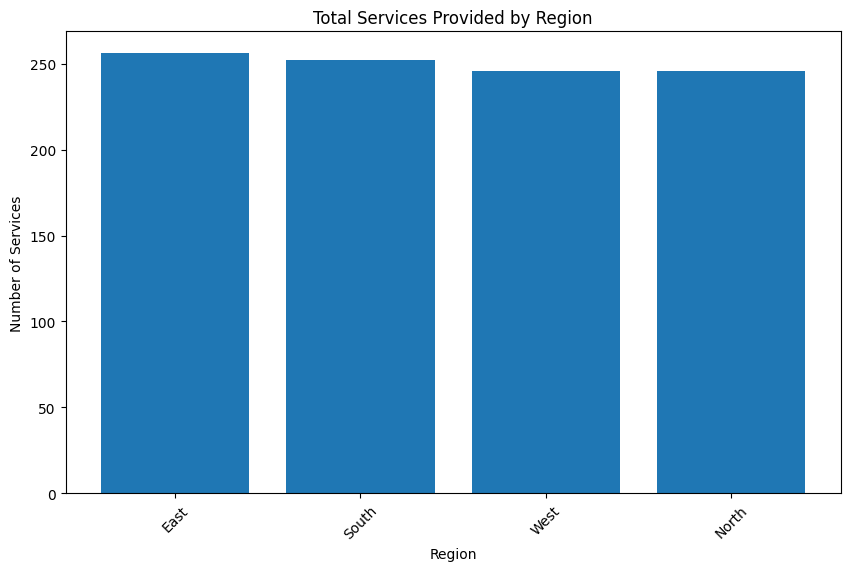

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')  # Save the plot as an image
plt.show()


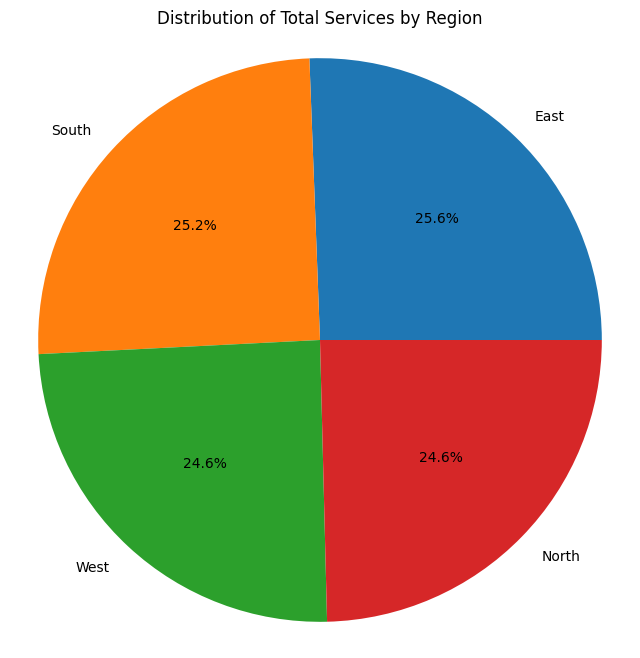

In [29]:
#Pie chart for total services by region
plt.figure(figsize=(8, 8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal') #Equal aspect ratio that pie chart is circular
plt.savefig('services_distribution_by_region.png')  # Save the plot as an image
plt.show()

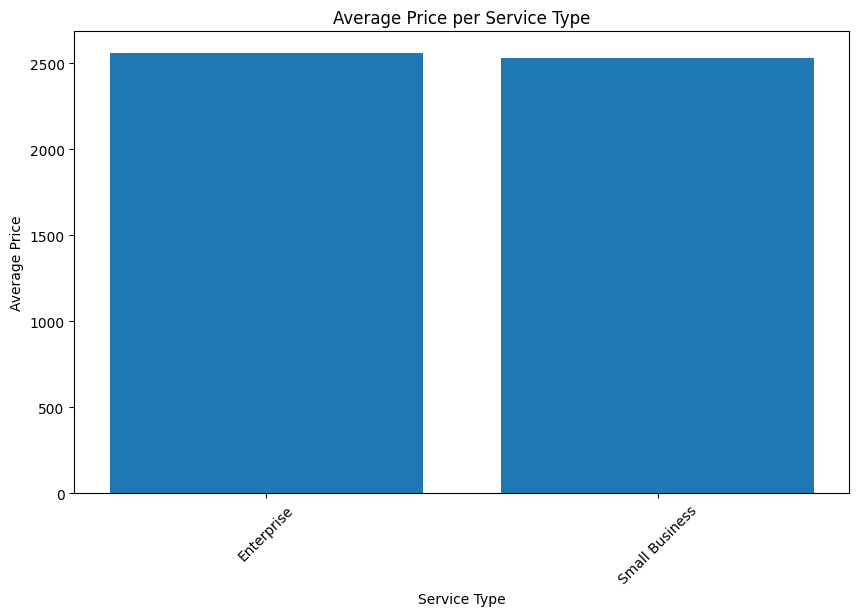

In [30]:
#Bar plot of average price per type
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  # Save the figure size
plt.show()


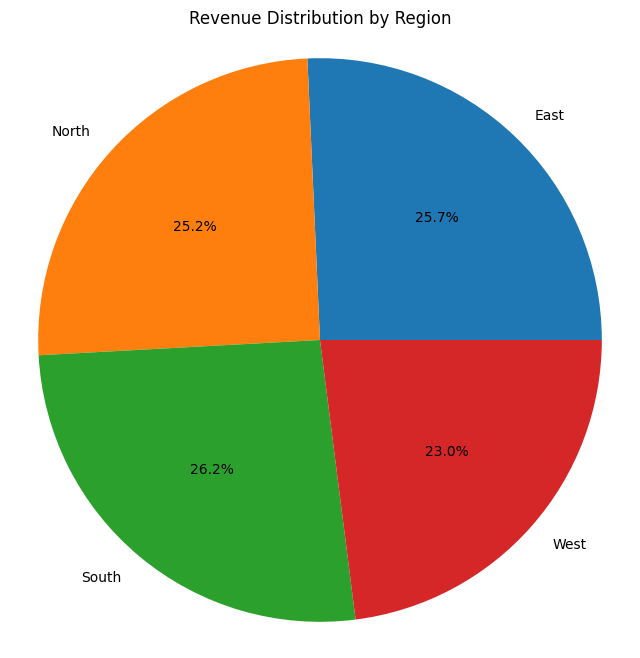

In [31]:
#Pie chart for revenue by service type
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region.png')  # Save the figure
plt.show()


##Save output in file

In [33]:
#save output to a text file
with open('analysis_output.txt', 'w') as f:
  f.writelines(output)